# Improving Orbit Propagation of Space Objects

In [1]:
# Libraries:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data:
def load_data (data_id = "31698", coor_type = "XYZ"):
    if data_id not in ["31698", "31722", "36605", "40309"]:
        raise ValueError("Invalid `data_id` value.")
    if coor_type not in ["XYZ", "RTN"]:
        raise ValueError("Invalid `coor_type` value.")
    full_dir = os.path.join("./Dataset", data_id, coor_type, "P1.csv")
    return pd.read_csv(full_dir)

# Visualisation:
df = load_data(coor_type = "RTN")

# Remove `Unnamed: 0` Column:
df.drop("Unnamed: 0", axis = "columns", inplace = True)

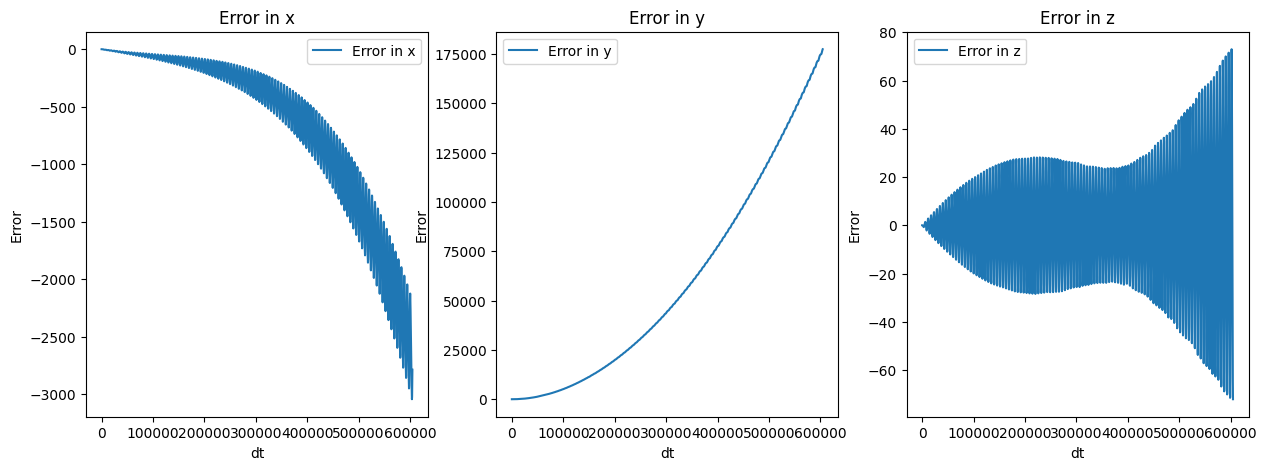

In [2]:
def plot_errors (df = df, target_time = 0.0):
    if target_time not in df["Time"].unique():
        raise ValueError("Invalid `target_time` value.")
    # Filter by `Time` = target_time.
    df_filter = df[df["Time"] == target_time]
    # Create subplots.
    fig, axs = plt.subplots(1, 3, figsize = (15, 5))
    # Plot differences:
    for idx, coord in enumerate(["x", "y", "z"]):
        true_val = "True_" + coord
        pred_val = "Approx_" + coord
        axs[idx].plot(
            df_filter["Delta_t"], df_filter[true_val] - df_filter[pred_val],
            label = "Error in " + coord
        )
        axs[idx].set_xlabel("dt")
        axs[idx].set_ylabel("Error")
        axs[idx].set_title("Error in " + coord)
        axs[idx].legend()
    plt.show()

plot_errors()

In [3]:
# Replace `True` and `Approx` Columns by their Error:
for coord in ["x", "y", "z"]:
    # Create Error Columns:
    # 1: For Position
    true_pos = "True_" + coord
    pred_pos = "Approx_" + coord
    error_pos = "Error_" + coord
    df[error_pos] = df[true_pos] - df[pred_pos]
    # 2: For Velocity
    true_vel = "True_v" + coord
    pred_vel = "Approx_v" + coord
    error_vel = "Error_v" + coord
    df[error_vel] = df[true_pos] - df[pred_pos]
    # Drop `True` and `Approx` Columns:
    # 1: For Position
    df.drop(true_pos, axis = "columns", inplace = True)
    df.drop(pred_pos, axis = "columns", inplace = True)
    # 2: For Velocity
    df.drop(true_vel, axis = "columns", inplace = True)
    df.drop(pred_vel, axis = "columns", inplace = True)

# Remove `Time` Column:
df.drop("Time", axis = "columns", inplace = True)

In [8]:
################################################################################
#
# Create a Sample Model for the "X" Variable:
#
################################################################################

# Options: "x", "y", "z", "vx", "vy", "vz".
target_var = "x"

# Creating Dataframe:
target_columns = [
    "Delta_t", 
    "c1_" + target_var,
    "c2_" + target_var,
    "c3_" + target_var,
    "c4_" + target_var,
    "c5_" + target_var,
    "Error_" + target_var
]

full_data = df[target_columns]





,Delta_t,c1_x,c2_x,c3_x,c4_x,c5_x,Error_x
0,0.0,-6.409894,-60.424817,-103.311418,751.169781,3679.293225,0.000000
1,300.0,-11.912883,-76.037030,-85.759574,411.638310,3570.547579,-0.027023
2,600.0,-10.764104,-82.408149,-79.812750,422.008787,4503.334065,-0.116288
3,900.0,0.000082,-77.274930,-93.779179,449.389617,4695.482014,-0.241138
4,1200.0,-19.798722,-66.446184,-98.230241,789.842208,3760.250248,-0.344025
...,...,...,...,...,...,...,...
80635,603300.0,-4.563697,-72.643549,-61.867162,791.050482,5502.722503,-3129.521909
80636,603600.0,-16.359182,-76.074953,-93.641033,691.027250,5229.305787,-3018.949842
80637,603900.0,-31.451524,-97.784144,-70.793310,806.041562,4839.260299,-2980.417337
80638,604200.0,-1.703909,-62.002672,-73.486995,1054.658652,5129.729237,-3018.134459


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80640 entries, 0 to 80639
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Delta_t   80640 non-null  float64
 1   c1_x      80640 non-null  float64
 2   c1_y      80640 non-null  float64
 3   c1_z      80640 non-null  float64
 4   c1_vx     80640 non-null  float64
 5   c1_vy     80640 non-null  float64
 6   c1_vz     80640 non-null  float64
 7   c1_t      80640 non-null  float64
 8   c2_x      80640 non-null  float64
 9   c2_y      80640 non-null  float64
 10  c2_z      80640 non-null  float64
 11  c2_vx     80640 non-null  float64
 12  c2_vy     80640 non-null  float64
 13  c2_vz     80640 non-null  float64
 14  c2_t      80640 non-null  float64
 15  c3_x      80640 non-null  float64
 16  c3_y      80640 non-null  float64
 17  c3_z      80640 non-null  float64
 18  c3_vx     80640 non-null  float64
 19  c3_vy     80640 non-null  float64
 20  c3_vz     80640 non-null  fl